### Install necessary libraries


In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
! pip install instaloader matplotlib numpy


Defaulting to user installation because normal site-packages is not writeable


##### Load Session using sessionID to login 

In [3]:

import instaloader
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from datetime import datetime
 
def load_instagram_session(session_id):
    """
    Load Instagram session using a session ID provided by the user.
    """
    try:
        loader = instaloader.Instaloader()
        loader.context._session.cookies.set("sessionid", session_id)
        return loader
    except Exception as e:
        print(f"Error loading session: {e}")
        return None


####  Fetch and display basic Instagram profile details 

In [4]:
def fetch_profile_data(username, loader):
   
    try:
        profile = instaloader.Profile.from_username(loader.context, username)
        print(f"Profile Name: {profile.full_name}")
        print(f"Bio: {profile.biography}")
        print(f"Followers: {profile.followers}")
        print(f"Following: {profile.followees}")
        return profile
    except Exception as e:
        print(f"Error fetching profile data: {e}")
        return None


#### Calculate engagement rate based on likes, comments, and followers

In [5]:
def calculate_engagement_rate(likes, comments, followers):

    try:
        total_engagement = sum(likes) + sum(comments)
        engagement_rate = (total_engagement / (followers * len(likes))) * 100
        return engagement_rate
    except ZeroDivisionError:
        return 0

def analyze_engagement_rate(profile):
   
    try:
        followers = profile.followers
        likes, comments,post_dates = [], [], []

        for post in profile.get_posts():
            if(datetime.now()-post.date).days<=180:
                likes.append(post.likes)
                comments.append(post.comments)
                post_dates.append(post.date.strftime('%Y-%m'))
            else:
                break
        # Calculate monthly engagement rates
        engagement_rates = {}
        for date, like, comment in zip(post_dates, likes, comments):
            if date not in engagement_rates:
                engagement_rates[date] = {'likes': 0, 'comments': 0, 'count': 0}
            engagement_rates[date]['likes'] += like
            engagement_rates[date]['comments'] += comment
            engagement_rates[date]['count'] += 1
        
        # Compute monthly rates
        monthly_engagement_rate = {}
        for date, data in engagement_rates.items():
            total_engagement = data['likes'] + data['comments']
            monthly_engagement_rate[date] = (total_engagement / (followers * data['count'])) * 100
        
        # Plot engagement rate graph
        plot_engagement_rate(monthly_engagement_rate)
        return monthly_engagement_rate
    except Exception as e:
        print(f"Error calculating engagement rate: {e}")
        return None

def plot_engagement_rate(monthly_engagement_rate):
    """
    Plot a line graph of engagement rates over the last 6 months.
    """
    months = list(monthly_engagement_rate.keys())
    rates = list(monthly_engagement_rate.values())

    plt.figure(figsize=(10, 6))
    plt.plot(months, rates, marker='o', color='blue', label="Engagement Rate (%)")
    plt.xlabel("Month")
    plt.ylabel("Engagement Rate (%)")
    plt.title("Engagement Rate Over Last 6 Months")
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



#### Hashtag Categories 

In [6]:
HASHTAG_CATEGORIES = {
    "fashion": ["fashion", "style", "ootd", "trend", "vintage", "designer"],
    "beauty": ["beauty", "makeup", "skincare", "cosmetics", "beautytips"],
    "fitness": ["fitness", "workout", "health", "gym", "exercise"],
    "travel": ["travel", "wanderlust", "adventure", "vacation", "destination"],
    "food": ["food", "foodie", "yum", "recipe", "cooking"],
}

def categorize_influencer_by_hashtags(profile):
    """
    Categorize an influencer based on the hashtags in their posts.
    """
    try:
        hashtags = []
        for post in profile.get_posts():
            hashtags.extend(post.caption_hashtags)
            if len(hashtags) >= 50:  # Limit to 50 posts
                break

        hashtag_counter = Counter(hashtags)
        category_count = {category: 0 for category in HASHTAG_CATEGORIES}

        for hashtag, count in hashtag_counter.items():
            for category, keywords in HASHTAG_CATEGORIES.items():
                if hashtag in keywords:
                    category_count[category] += count

        influencer_type = max(category_count, key=category_count.get)
        print(f"Categorized as a '{influencer_type}' influencer.")
        plot_hashtag_frequency(hashtag_counter)
    except Exception as e:
        print(f"Error during categorization: {e}")

def plot_hashtag_frequency(hashtag_counter):
    """
    Plot the frequency of top hashtags.
    """
    common_hashtags = hashtag_counter.most_common(10)
    hashtags, counts = zip(*common_hashtags)
    plt.figure(figsize=(10, 6))
    plt.barh(hashtags, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Top 10 Most Frequent Hashtags')
    plt.gca().invert_yaxis()
    plt.show()


#### Estimate earnings per post based on followers and engagement rate

In [7]:
def estimate_earnings(followers, engagement_rate):
    """
    Estimate earnings per post based on followers and engagement rate.
    """
    rate_per_1000 = 0.10  # $0.10 per 1,000 followers
    estimated_earnings = (followers * engagement_rate) / 1000 * rate_per_1000
    return estimated_earnings

def plot_estimated_earnings(monthly_engagement_rate, followers):
    """
    Plot a bar chart of estimated earnings over the last 6 months.
    """
    months = list(monthly_engagement_rate.keys())
    earnings = [estimate_earnings(followers, rate) for rate in monthly_engagement_rate.values()]

    plt.figure(figsize=(10, 6))
    plt.bar(months, earnings, color='green', alpha=0.7, label="Earnings ($)")
    plt.xlabel("Month")
    plt.ylabel("Estimated Earnings ($)")
    plt.title("Estimated Earnings Per Month")
    plt.grid(axis='y')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



#### Function to analyze an Instagram Profile 

Profile Name: Shraddha Singh
Bio: 🧴 Certified Skincare Consultant
👩🏻‍🔬 Cosmetic Formulator in training 
✩ Sidekicks @kikiandaani 
✩ YouTube 2.8M+ | Tiktok 700K+ 
✩ contact@shrads.com
Followers: 2020605
Following: 830

--- Engagement Rate Analysis ---


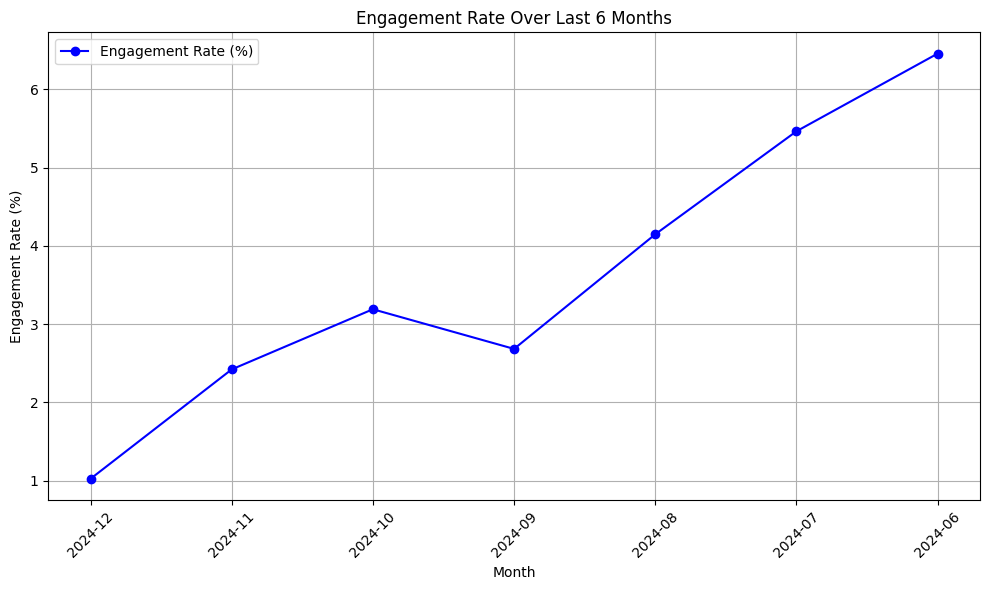


--- Hashtag Categorization ---
Categorized as a 'fashion' influencer.


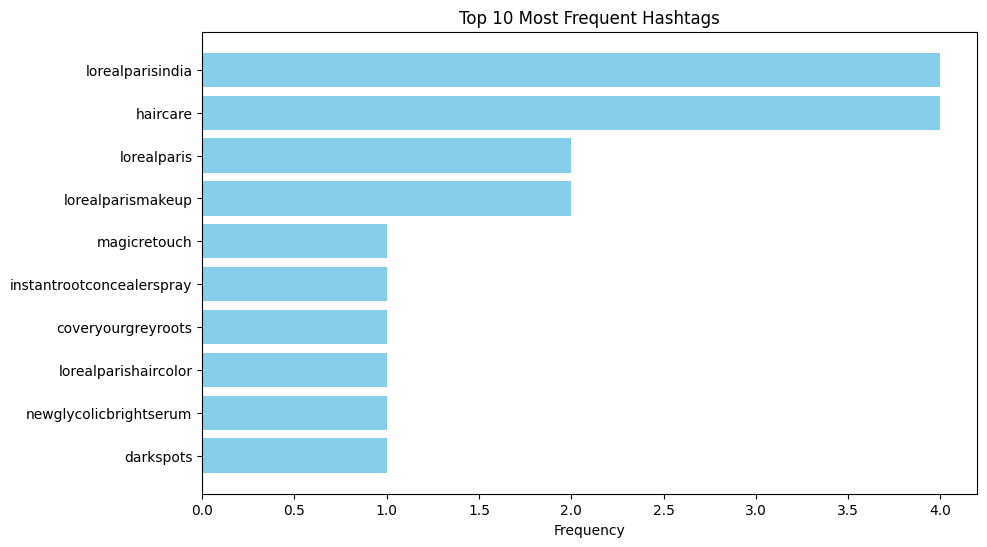


--- Earnings Estimation ---


TypeError: unsupported operand type(s) for *: 'int' and 'dict'

In [8]:
def instagram_analysis():

    session_id = input("Enter your Instagram session ID: ")
    username = input("Enter the Instagram username to analyze: ")
    
    loader = load_instagram_session(session_id)
    if not loader:
        return
    
    profile = fetch_profile_data(username, loader)
    if not profile:
        return
    
    print("\n--- Engagement Rate Analysis ---")
    engagement_rate = analyze_engagement_rate(profile)
    
    print("\n--- Hashtag Categorization ---")
    categorize_influencer_by_hashtags(profile)
    
    print("\n--- Earnings Estimation ---")
    estimate_earnings(profile.followers, engagement_rate)

# Run the Analysis
instagram_analysis()
